In [29]:
import numpy as np
import librosa
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt

In [35]:
audio, sr = librosa.load("./audio/audio.flac", sr=16000)
n_fft = 1200
win_length = n_fft
hop_length = int(win_length/4)

In [36]:
S = librosa.core.stft(audio, n_fft=n_fft,  hop_length=hop_length, win_length=win_length)

stacked = np.concatenate([S, S], axis=0)

mel = librosa.feature.melspectrogram(audio, sr=sr, n_mels=400)

stacked_mel = np.concatenate([mel, mel], axis=0)

S.shape, stacked.shape, mel.shape, sr, audio.shape,

((601, 105), (1202, 105), (400, 62), 16000, (31440,))

/home/afchi/.local/lib/python3.8/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


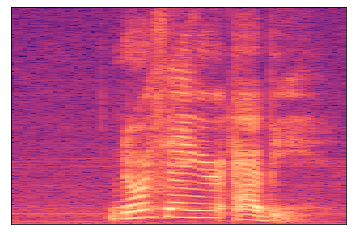

In [32]:
plt.figure()
plt.subplot(1,1,1)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max, top_db=None), )#y_axis='log'
# librosa.display.specshow(S, y_axis='log')

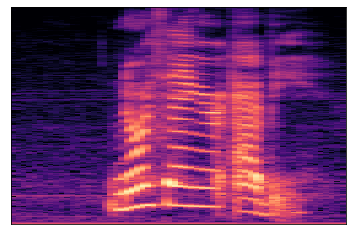

In [69]:
plt.figure()
plt.subplot(1,1,1)
librosa.display.specshow(librosa.amplitude_to_db(mel, ref=np.max, top_db=None))

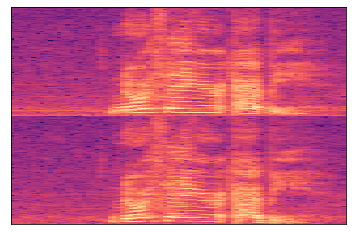

In [70]:
plt.figure()
plt.subplot(1,1,1)
librosa.display.specshow(librosa.amplitude_to_db(stacked, ref=np.max, top_db=None), )#y_axis='log'
# librosa.display.specshow(S, y_axis='log')

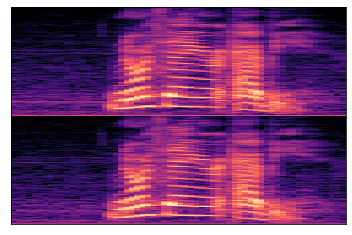

In [71]:
plt.figure()
plt.subplot(1,1,1)
librosa.display.specshow(librosa.amplitude_to_db(stacked_mel, ref=np.max, top_db=None))

In [97]:
melfb = librosa.filters.mel(sr=16000, n_fft=1200, n_mels=40)
melfb.shape

(40, 601)

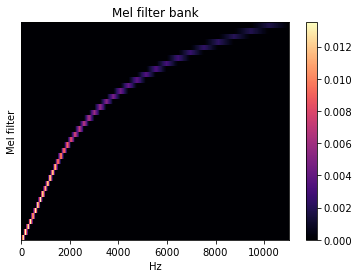

In [38]:
fig, ax = plt.subplots()
img = librosa.display.specshow(melfb, x_axis='linear', ax=ax)
ax.set(ylabel='Mel filter', title='Mel filter bank')
fig.colorbar(img, ax=ax)

In [39]:
magnitudes = np.abs(S) ** 2
mel = np.log10(np.dot(melfb, magnitudes,) + 1e-6)
magnitudes.shape, mel.shape

((601, 105), (40, 105))

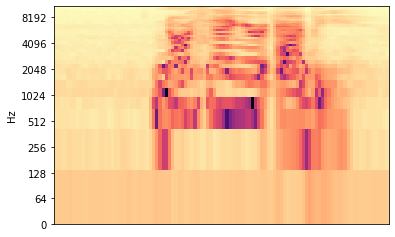

In [40]:
plt.figure()
plt.subplot(1,1,1)
librosa.display.specshow(librosa.amplitude_to_db(mel, ref=np.max, top_db=None), y_axis='log')

In [1]:
import soundfile as sf
a_1, sr_1 = librosa.load("./audio/1.flac", sr=16000)
a_2, sr_2 = librosa.load("./audio/2.flac", sr=16000)
a_3, sr_3 = librosa.load("./audio/3.flac", sr=16000)
print(a_1.shape, a_2.shape, a_3.shape)

NameError: name 'librosa' is not defined

In [97]:
a_out = np.append(a_2,a_3)
if a_2.shape > a_3.shape:
    a_out = a_2[:a_3.shape[0]] + a_3
else:
    a_out = a_3[:a_2.shape[0]] + a_2

print(str(a_out.shape))
sf.write('./audio/joined_file.wav', a_out, sr_2)

a_loaded, sr = librosa.load('./audio/joined_file.wav')
print(str(a_loaded.shape))

(222160,)
(306165,)


In [98]:
a_3.shape[0]

222160

In [1]:
from utils.get_audio import GetAudio

In [2]:
G = GetAudio("./audio/")

In [17]:
G.train_data()

(40, 1736) (801, 556) (801, 556)


(array([[-2.0737698, -2.3989968, -2.374293 , ..., -2.828377 , -3.4772525,
         -3.9852614],
        [-3.2639728, -3.2267041, -3.0759897, ..., -3.954741 , -3.9788036,
         -4.6432624],
        [-3.7376564, -3.5891728, -3.1602435, ..., -3.4532313, -3.5258636,
         -4.1005907],
        ...,
        [-5.9979134, -5.996602 , -5.996198 , ..., -5.9993553, -5.998547 ,
         -5.9365435],
        [-5.9982443, -5.99899  , -5.999056 , ..., -5.9993086, -5.998642 ,
         -5.951294 ],
        [-5.997786 , -5.999054 , -5.998547 , ..., -5.999352 , -5.9987903,
         -5.9536   ]], dtype=float32),
 array([[ 4.40676546e+00+0.0000000e+00j,  2.57632351e+00+0.0000000e+00j,
         -3.08811098e-01+0.0000000e+00j, ...,
          1.54240727e+00+0.0000000e+00j, -1.26934469e+00+0.0000000e+00j,
         -1.30567527e+00+0.0000000e+00j],
        [-2.02212167e+00-6.2544394e-16j, -2.35616875e+00-1.8237571e+00j,
          1.57312894e+00-1.0225695e+00j, ...,
         -8.22185218e-01-2.5249290e+00j, 

In [6]:
import os, glob

In [12]:
sorted(glob.glob(os.path.join("./audio/", "*/*.flac")))

['./audio/id1/1.flac', './audio/id2/2.flac', './audio/id3/3.flac']

In [4]:
from os import walk

_, foldernames, filenames = next(walk("./audio/"))

In [5]:
foldernames

['id2', 'id1', 'id3']

In [6]:
import random
random.sample(["red", "blue"], k=5, counts=[4, 2])

TypeError: sample() got an unexpected keyword argument 'counts'

In [20]:
import numpy as np
import torch

In [27]:
np.hstack([np.zeros(0), np.ones(5)]) 

array([1., 1., 1., 1., 1.])

In [25]:
torch.stack([torch.rand([1, 3, 4]), torch.rand([1, 3, 4])], dim=1).shape

torch.Size([1, 2, 3, 4])

In [27]:
torch.tensor([1, 2, 3, 4, 5]).expand(3, 5)

tensor([[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]])

In [28]:
320/8

40.0